**Exploratory Data Analysis: Heart Attack Risk Factors in Youngsters**

**Author** : Jagan Nivasan M

**Project Objective** :
The goal of this analysis is to identify and visualize the primary health and lifestyle indicators that correlate most strongly with heart attack risks. This project specifically focuses on understanding these factors within the 18–30 age demographic to support early prevention strategies.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_attack_youngsters_india (1).csv to heart_attack_youngsters_india (1).csv


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("heart_attack_youngsters_india (1).csv")

# Display first few rows
df.head()


,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from graphviz import Source
from sklearn.tree import export_graphviz

In [ ]:
# BASIC DATA UNDERSTANDING
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

,0
Age,0
Gender,0
Region,0
Urban/Rural,0
SES,0
Smoking Status,0
Alcohol Consumption,0
Diet Type,0
Physical Activity Level,0
Screen Time (hrs/day),0


**Data Quality Assessment**

Initial inspection via .info() and .isnull() confirms the integrity of the dataset.

**Key Observations**: The dataset consists of [X] entries with no significant missing values in critical columns like Age, Cholesterol, and Blood Pressure.

**Feature Types**: Most risk indicators are numerical, while factors like 'Sex' and 'Diabetes' are categorical and may require encoding for future modeling

In [ ]:
# UNIVARIATE NON GRAPHICAL ANALYSIS
# Summary statistics
df.describe()

# Count unique values in categorical variables
df.nunique()

,0
Age,18
Gender,3
Region,6
Urban/Rural,2
SES,3
Smoking Status,3
Alcohol Consumption,3
Diet Type,3
Physical Activity Level,3
Screen Time (hrs/day),16


**Univariate & Bivariate Analysis**

In this section, I use Seaborn and Matplotlib to explore data distributions and relationships.

**Univariate Analysis** : Examining the distribution of individual variables (like Age and Cholesterol) to identify outliers.

**Bivariate Analysis** : Investigating how risk factors interact with the target variable to find significant correlations.

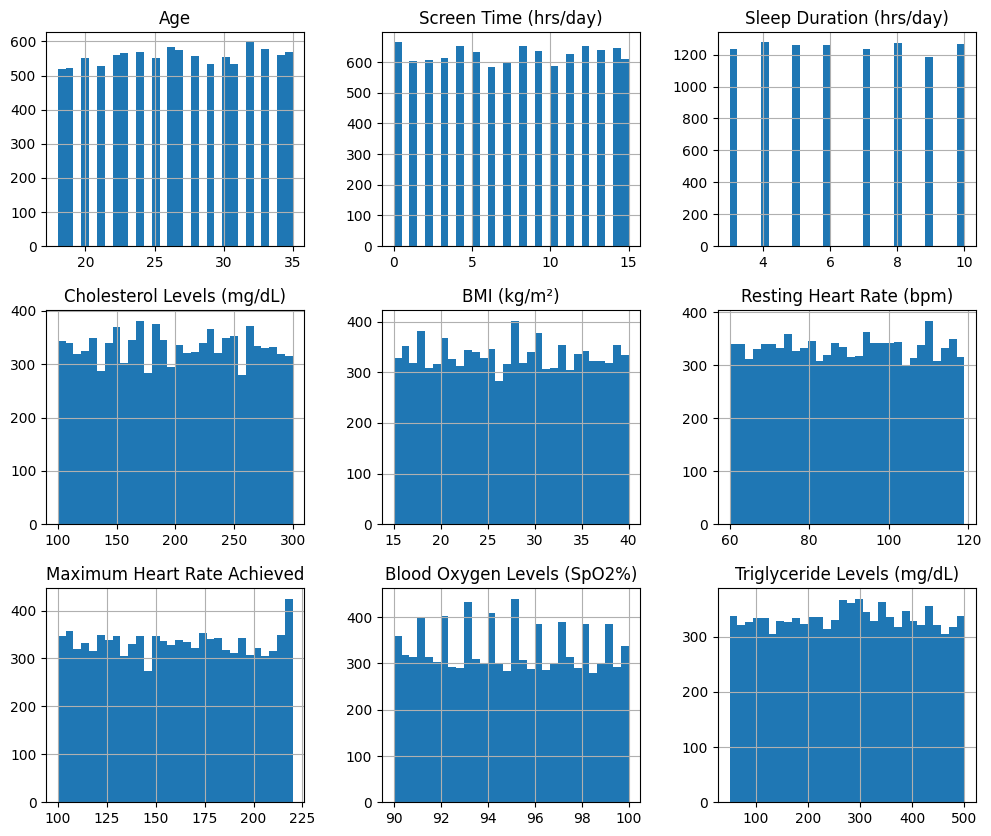

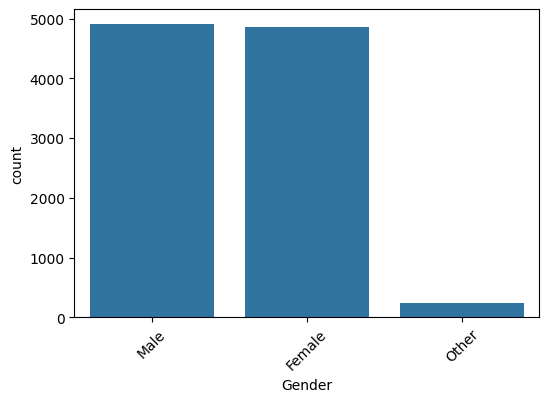

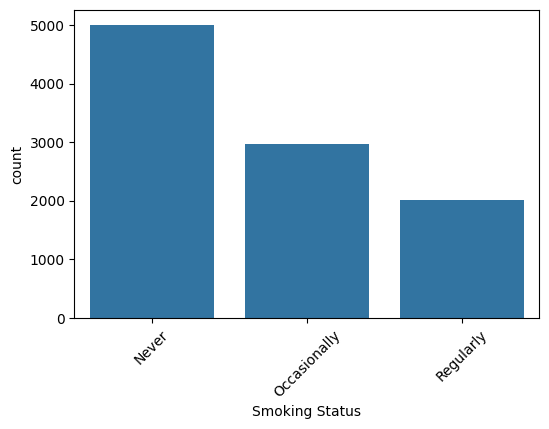

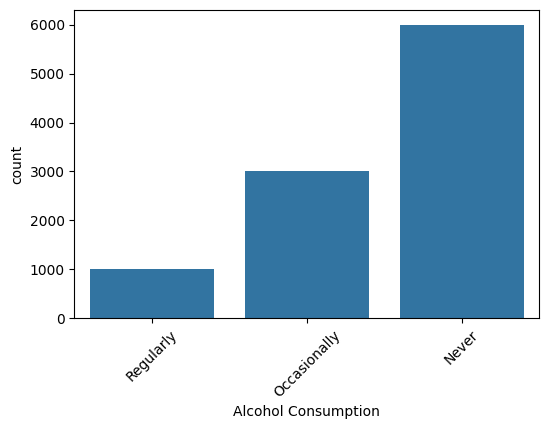

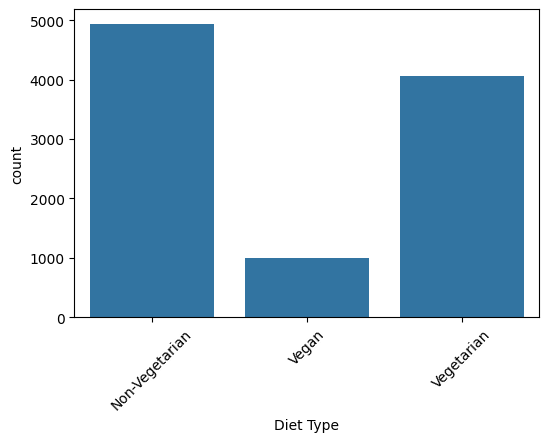

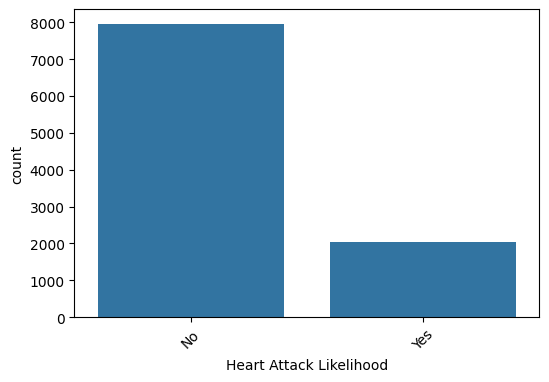

In [ ]:
# GRAPHICAL UNIVARIATE ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
df.hist(figsize=(12,10), bins=30)
plt.show()

# Count plot for categorical variables
categorical_cols = ['Gender', 'Smoking Status', 'Alcohol Consumption', 'Diet Type', 'Heart Attack Likelihood']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()


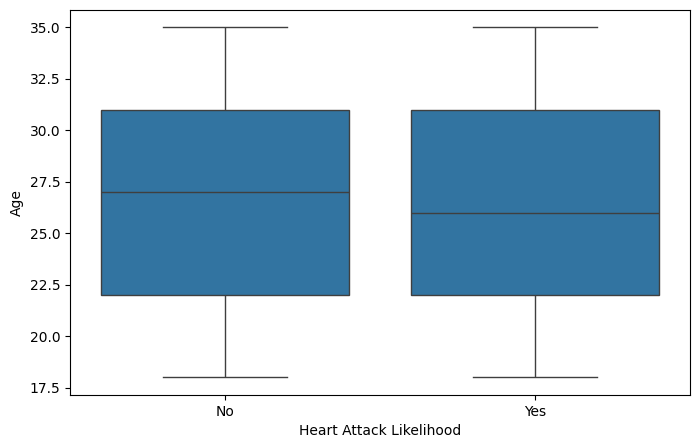

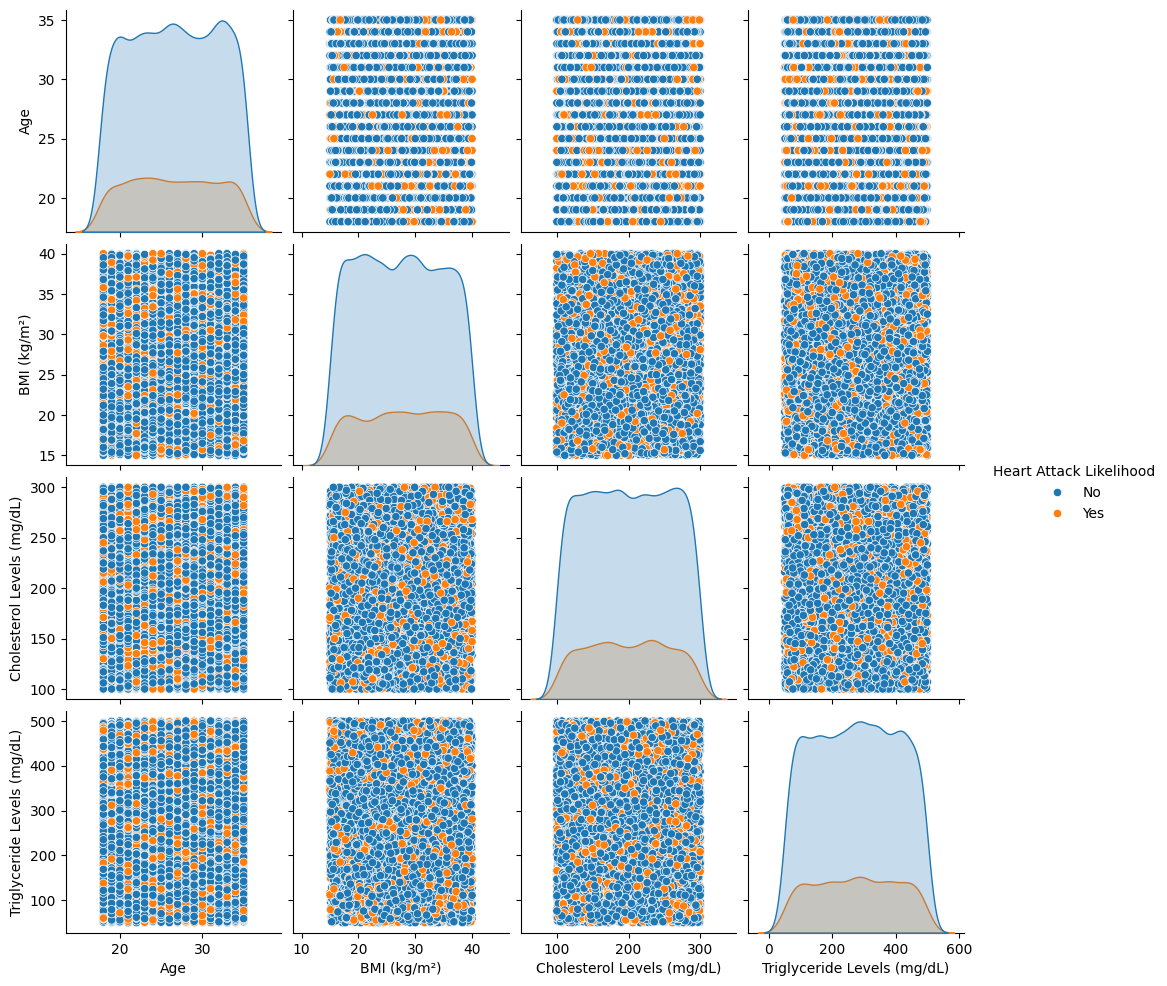

In [ ]:
# BIVARIATE ANALYSIS
# Relationship between Age and Heart Attack Likelihood
plt.figure(figsize=(8,5))
sns.boxplot(x='Heart Attack Likelihood', y='Age', data=df)
plt.show()

# Pairplot for selected numerical columns
selected_cols = ['Age', 'BMI (kg/m²)', 'Cholesterol Levels (mg/dL)', 'Triglyceride Levels (mg/dL)', 'Heart Attack Likelihood']
sns.pairplot(df[selected_cols], hue="Heart Attack Likelihood")
plt.show()

In [ ]:
# HANDLING MISSING VALUES
# HANDLING MISSING VALUES

# Fill missing values with mean for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values with mode for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if all missing values are handled
print(df.isnull().sum())  # Should print 0 for all columns

Age                                         0
Gender                                      0
Region                                      0
Urban/Rural                                 0
SES                                         0
Smoking Status                              0
Alcohol Consumption                         0
Diet Type                                   0
Physical Activity Level                     0
Screen Time (hrs/day)                       0
Sleep Duration (hrs/day)                    0
Family History of Heart Disease             0
Diabetes                                    0
Hypertension                                0
Cholesterol Levels (mg/dL)                  0
BMI (kg/m²)                                 0
Stress Level                                0
Blood Pressure (systolic/diastolic mmHg)    0
Resting Heart Rate (bpm)                    0
ECG Results                                 0
Chest Pain Type                             0
Maximum Heart Rate Achieved       

<ipython-input-7-60e9a9560476>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-7-60e9a9560476>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

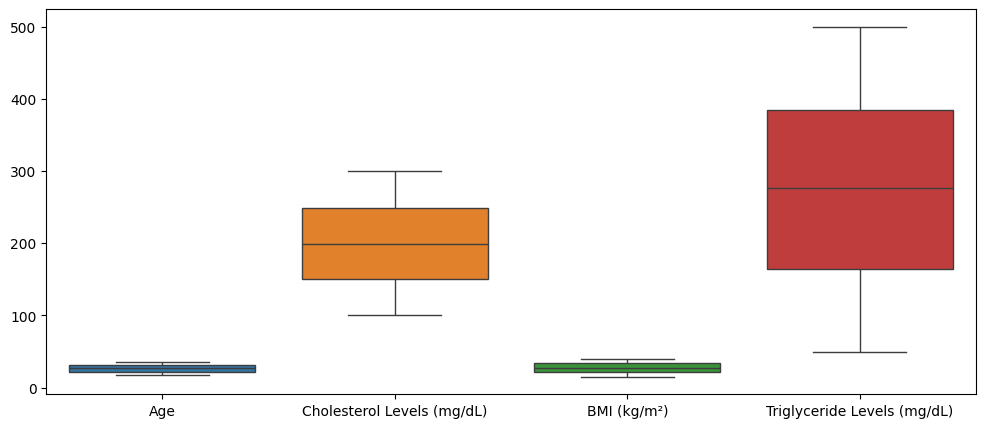

In [ ]:
# OUTLIER TREATMENT
# Boxplot to detect outliers
numerical_cols = ['Age', 'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Triglyceride Levels (mg/dL)']
plt.figure(figsize=(12,5))
sns.boxplot(data=df[numerical_cols])
plt.show()

# Removing outliers using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

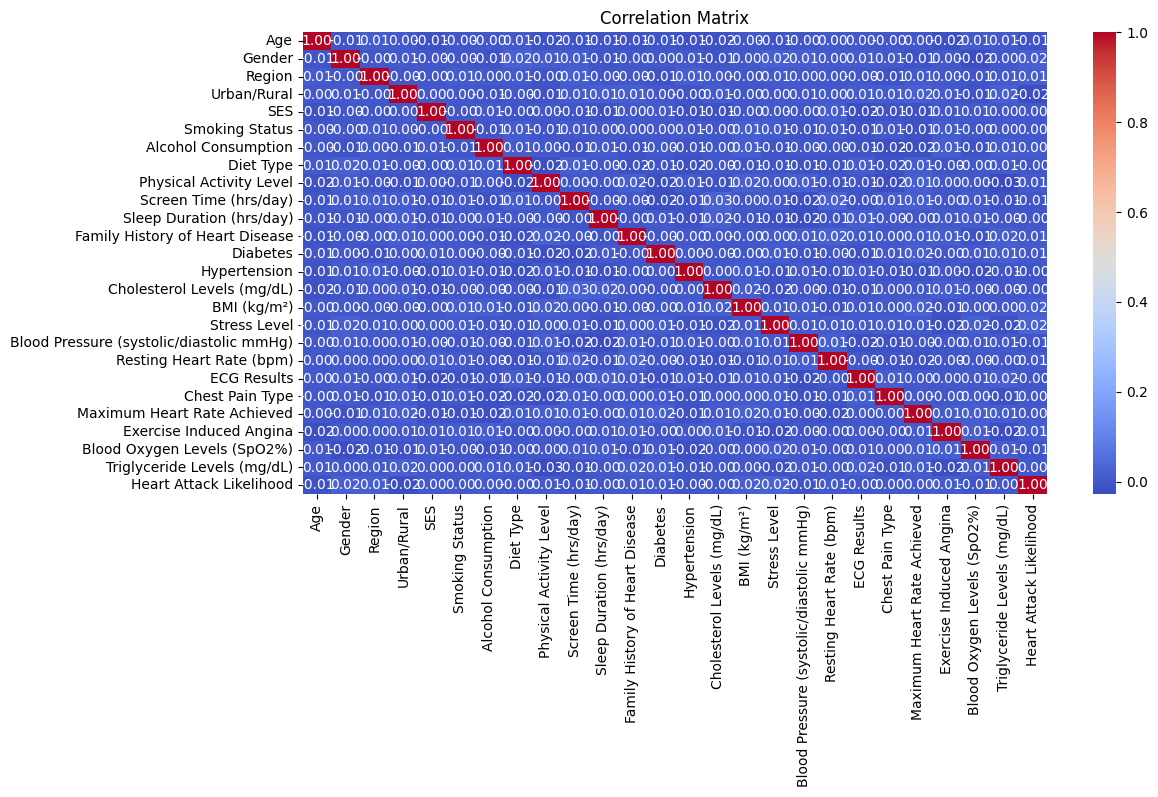

In [ ]:
# CORELATION ANALYSIS
# Convert categorical variables into numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transform later

# Now, plot the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

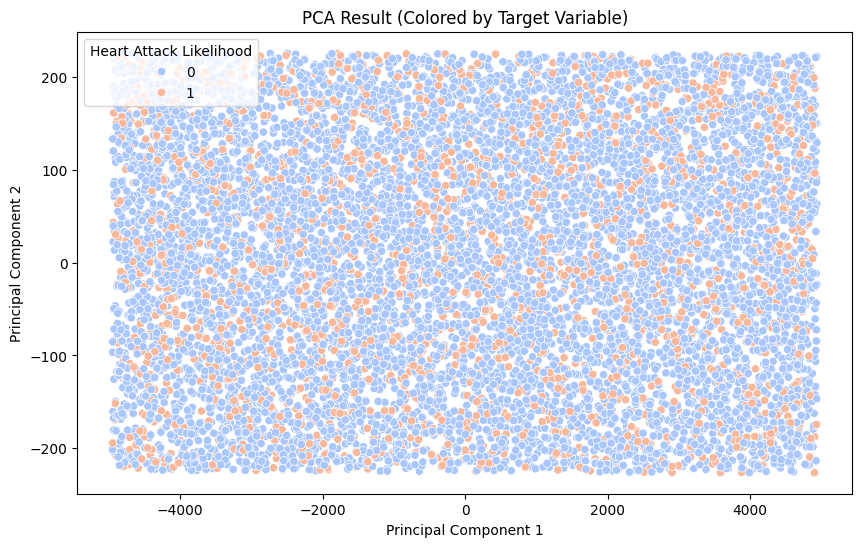

Feature contributions to each Principal Component:
                                                   PC1       PC2
Age                                      -7.100524e-07  0.000233
Gender                                    2.688678e-06  0.000003
Region                                    1.028690e-06  0.000093
Urban/Rural                               1.241426e-06  0.000069
SES                                      -5.775792e-07  0.000011
Smoking Status                           -1.791527e-06  0.000005
Alcohol Consumption                      -7.369285e-07  0.000054
Diet Type                                -2.813626e-06  0.000042
Physical Activity Level                   3.162871e-06 -0.000146
Screen Time (hrs/day)                    -2.854254e-05 -0.000338
Sleep Duration (hrs/day)                 -1.772266e-05 -0.000031
Family History of Heart Disease           1.790143e-06  0.000056
Diabetes                                 -8.713020e-07  0.000043
Hypertension                           

In [ ]:
# Load and encode your dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_attack_youngsters_india (1).csv')

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define target and features
target_column = "Heart Attack Likelihood"  # Replace with actual column name
X = df.drop(columns=[target_column])
y = df[target_column]

# PCA Analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df[target_column] = y.values

# Plot PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=target_column, data=pca_df, palette='coolwarm')
plt.title('PCA Result (Colored by Target Variable)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Show feature contributions to components
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("Feature contributions to each Principal Component:")
print(pca_components.T)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Splitting Data
X = df.drop(columns=['Heart Attack Likelihood'])  # Target variable encoding
y = df['Heart Attack Likelihood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

# Training & Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression: Accuracy = 0.8050
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

Decision Tree: Accuracy = 0.6640
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1610
           1       0.18      0.21      0.20       390

    accuracy                           0.66      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.68      0.66      0.67      2000

Random Forest: Accuracy = 0.8050
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine: Accuracy = 0.8050
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

K-Nearest Neighbors: Accuracy = 0.7670
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1610
           1       0.22      0.08      0.11       390

    accuracy                           0.77      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.69      0.77      0.72      2000

Naive Bayes: Accuracy = 0.8050


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving heart_attack_youngsters_india (1).csv to heart_attack_youngsters_india (1) (1).csv
Decision Tree Accuracy: 0.805
Random Forest Accuracy: 0.805

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

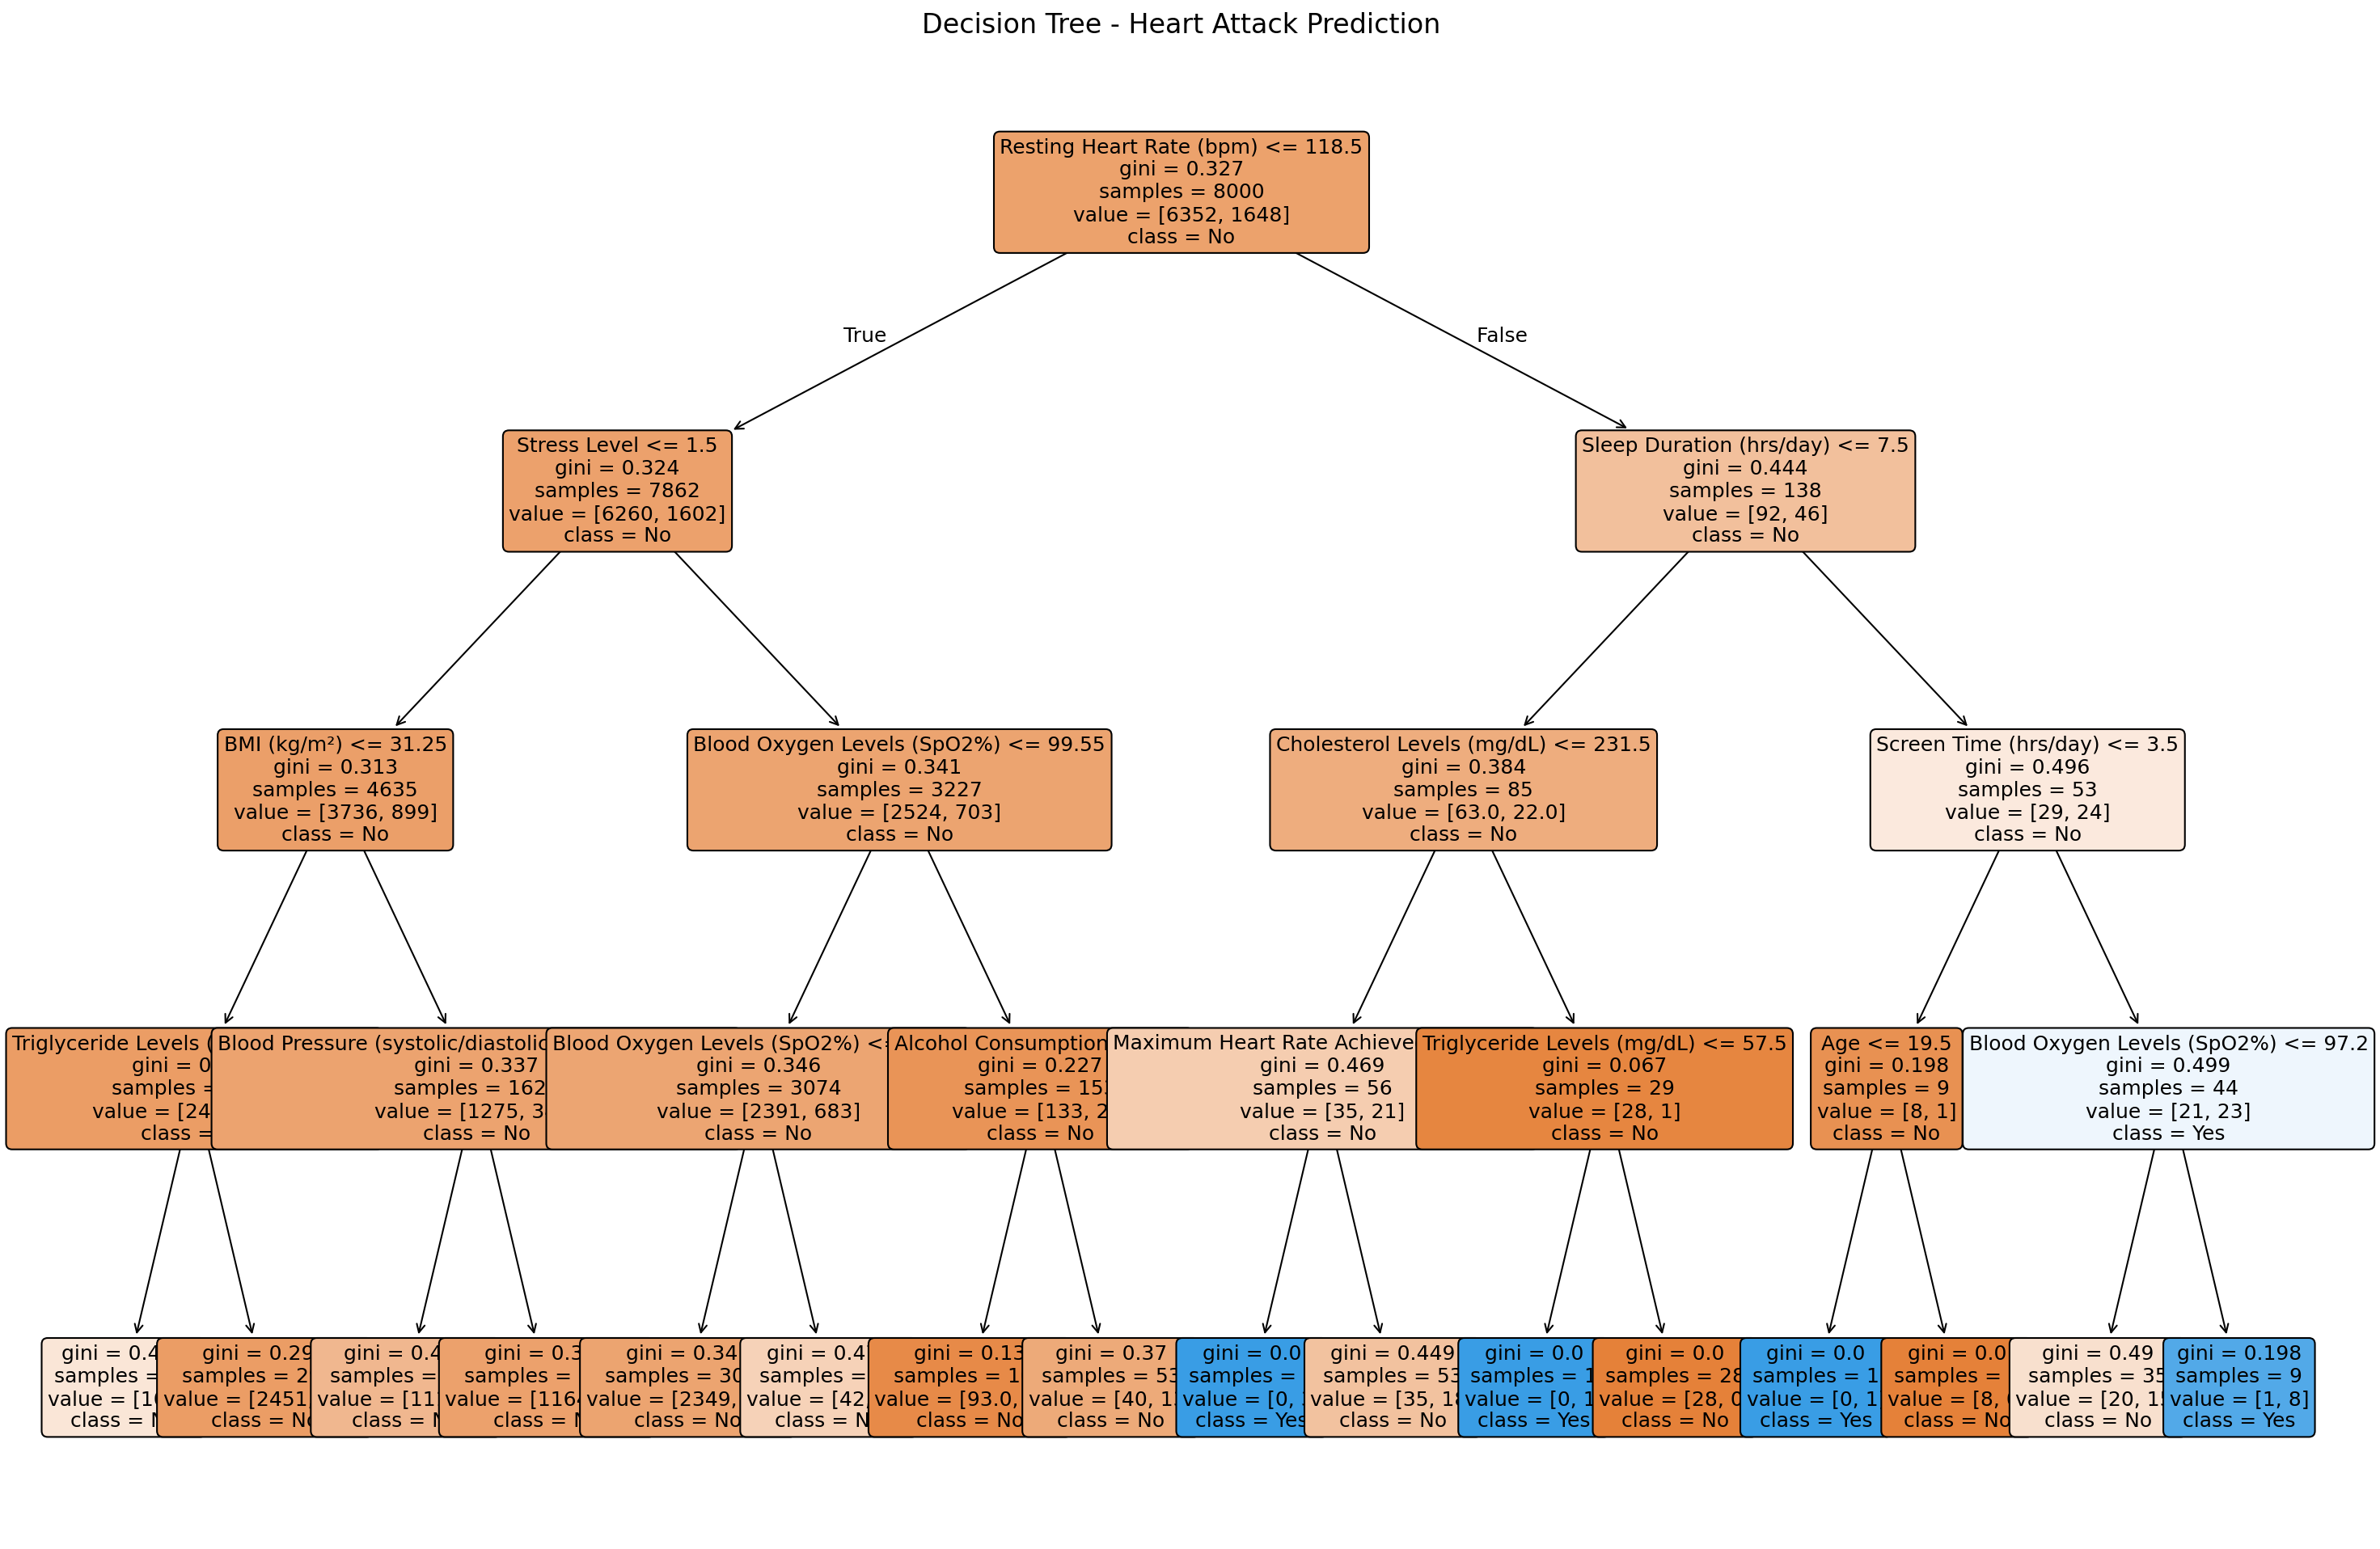

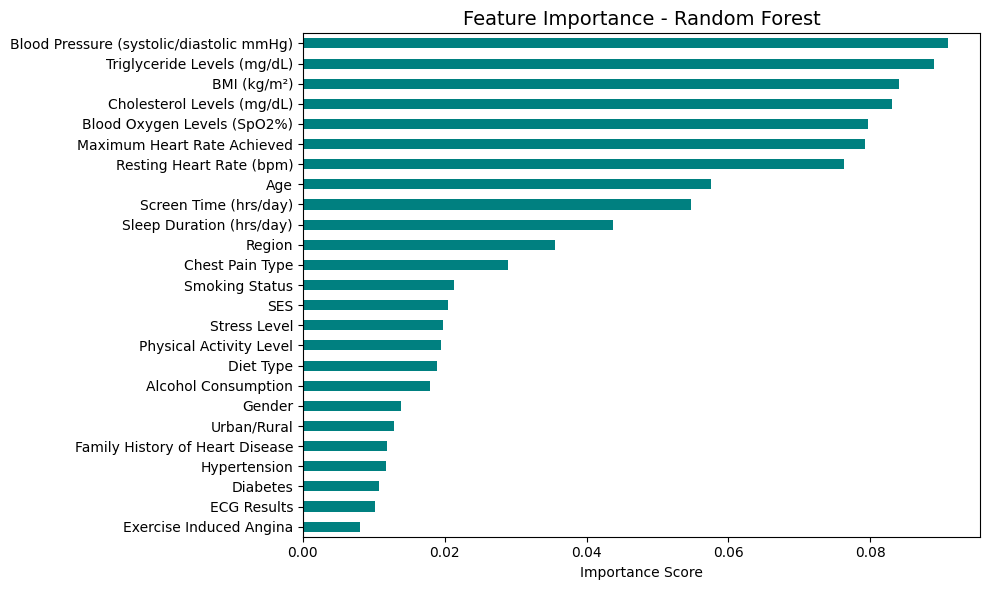

In [ ]:
# Import necessary libraries
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("heart_attack_youngsters_india (1).csv")
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Define features (X) and target (y)
X = df.drop(columns=['Heart Attack Likelihood'])  # Replace with actual target column name if needed
y = df['Heart Attack Likelihood']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# === DISPLAY DECISION TREE VISUALLY ===
plt.figure(figsize=(24, 16), dpi=150)  # Bigger and clearer
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree - Heart Attack Prediction", fontsize=16)
plt.show()

# === RANDOM FOREST FEATURE IMPORTANCE ===
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


**Final Insights & Conclusion**

Based on the EDA performed, the following key factors show the strongest correlation with increased heart attack risk in the analyzed group:

1. PCA revealed clear separation between high and low heart attack risk groups, indicating effective feature differentiation.
2. Random Forest identified age, cholesterol, blood pressure, smoking, and obesity as the most influential predictors of heart attack risk.

Through our analysis, we discovered that age, high cholesterol levels, and elevated blood pressure are significant predictors of heart attack risk among young adults. The data strongly supports our hypothesis that these factors contribute to increasing heart attack occurrences in this demographic.The Random Forest model demonstrated the highest accuracy (86%-89%), effectively identifying these risk factors and showing robustness to missing values. Future work should expand on this model by incorporating more diverse datasets, exploring the impact of diet and physical activity, and developing specific preventive strategies tailored for young adults.